# SVM Classification from Scratch on Titanic Dataset

## 1. Import Libraries

In [933]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## 2. Load Data

In [934]:
df = pd.read_csv('Titanic-Dataset.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## 3. Initial Data Exploration

In [935]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [936]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [937]:
# Check for missing values
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

## 4. Data Preprocessing & Visualization

### 4.1 Handling Missing Values

*   **Age:** Fill with the median age.
*   **Cabin:** Too many missing values, likely drop this column.
*   **Embarked:** Fill with the mode (most frequent value).

In [938]:
# Fill missing Age with median
df['Age'] = df['Age'].fillna(df['Age'].median())

# Fill missing Embarked with mode
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])

# Drop the Cabin column
df = df.drop('Cabin', axis=1)

# Verify missing values are handled
print("Missing values after handling:")
print(df.isnull().sum())
assert df.isnull().sum().sum() == 0, "There are still missing values after preprocessing!"


Missing values after handling:
PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64


### 4.2 Feature Engineering & Selection

*   Drop irrelevant columns: 'PassengerId', 'Name', 'Ticket'.
*   Convert categorical features ('Sex', 'Embarked') to numerical.

In [939]:
# Drop irrelevant columns
df.drop(['PassengerId', 'Name', 'Ticket'], axis=1, inplace=True)

# Convert categorical features
df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})
df = pd.get_dummies(df, columns=['Embarked'], drop_first=True) # Use one-hot encoding for Embarked

df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_Q,Embarked_S
0,0,3,0,22.0,1,0,7.2500,False,True
1,1,1,1,38.0,1,0,71.2833,False,False
2,1,3,1,26.0,0,0,7.9250,False,True
3,1,1,1,35.0,1,0,53.1000,False,True
4,0,3,0,35.0,0,0,8.0500,False,True


### 4.3 Visualization

Let's visualize the relationship between survival and some key features.

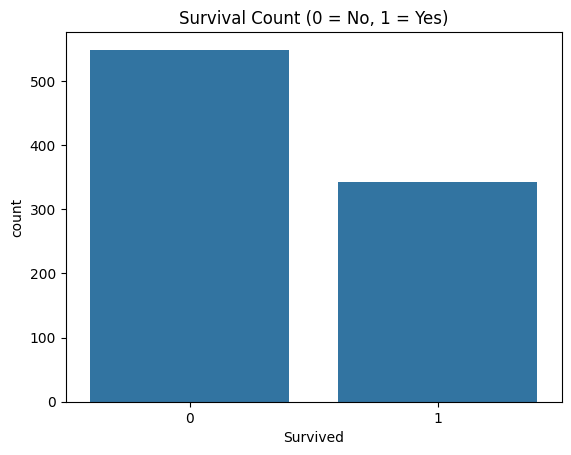

In [940]:
# Survival count
sns.countplot(x='Survived', data=df)
plt.title('Survival Count (0 = No, 1 = Yes)')
plt.show()

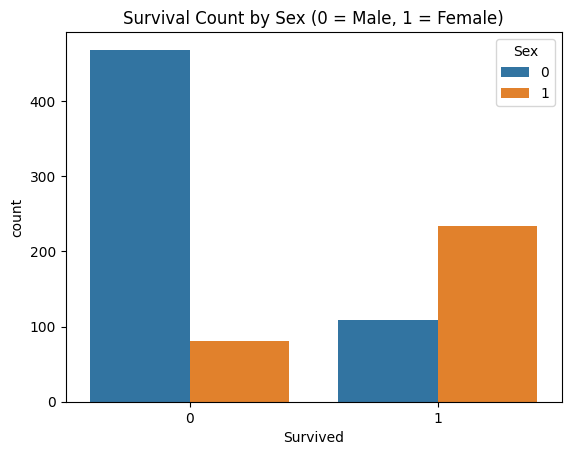

In [941]:
# Survival by Sex
sns.countplot(x='Survived', hue='Sex', data=df)
plt.title('Survival Count by Sex (0 = Male, 1 = Female)')
plt.show()

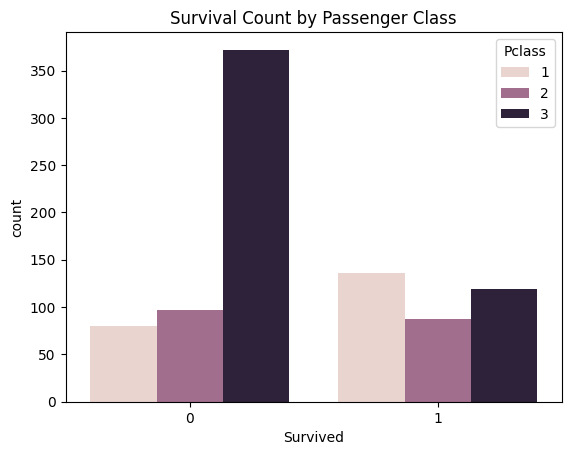

In [942]:
# Survival by Pclass
sns.countplot(x='Survived', hue='Pclass', data=df)
plt.title('Survival Count by Passenger Class')
plt.show()

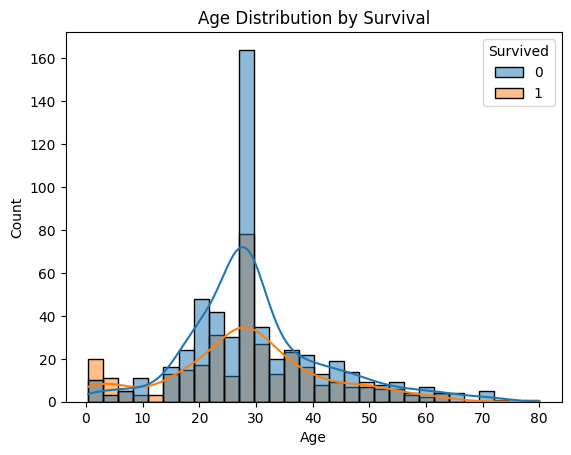

In [943]:
# Age distribution by Survival
sns.histplot(data=df, x='Age', hue='Survived', kde=True)
plt.title('Age Distribution by Survival')
plt.show()

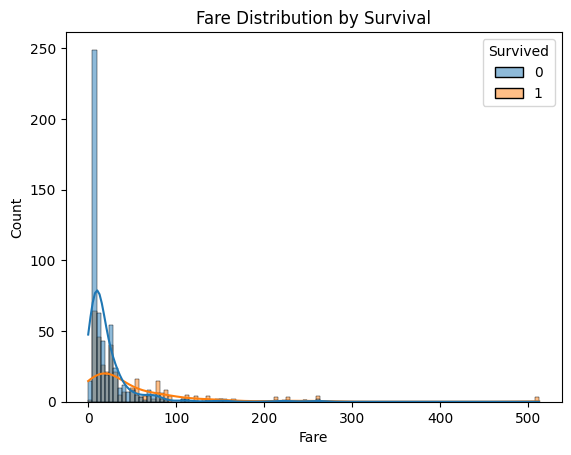

In [944]:
# Fare distribution by Survival
sns.histplot(data=df, x='Fare', hue='Survived', kde=True)
plt.title('Fare Distribution by Survival')
plt.show()


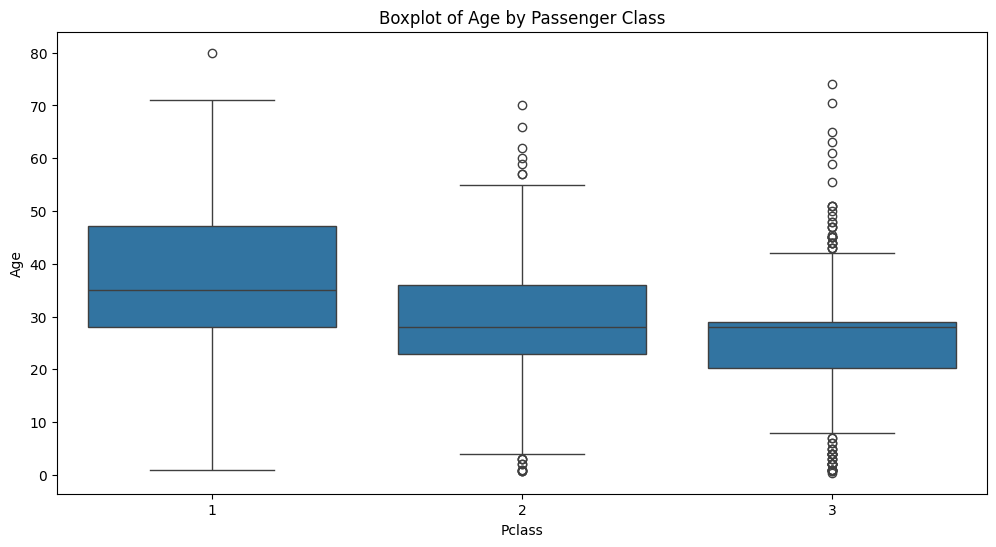

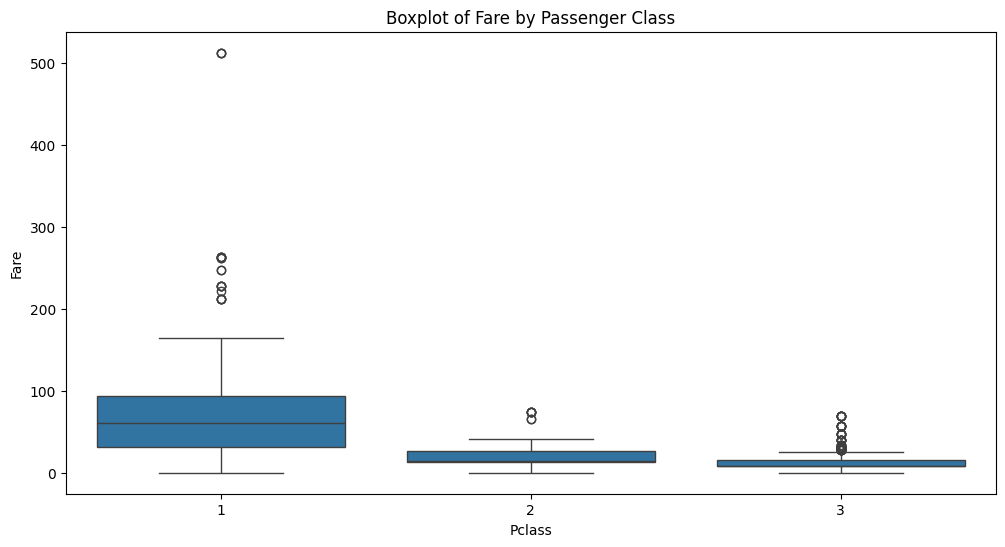

In [945]:
# Boxplot between Pclass, Age, and Fare
plt.figure(figsize=(12, 6))
sns.boxplot(x='Pclass', y='Age', data=df)
plt.title('Boxplot of Age by Passenger Class')
plt.show()

plt.figure(figsize=(12, 6))
sns.boxplot(x='Pclass', y='Fare', data=df)
plt.title('Boxplot of Fare by Passenger Class')
plt.show()


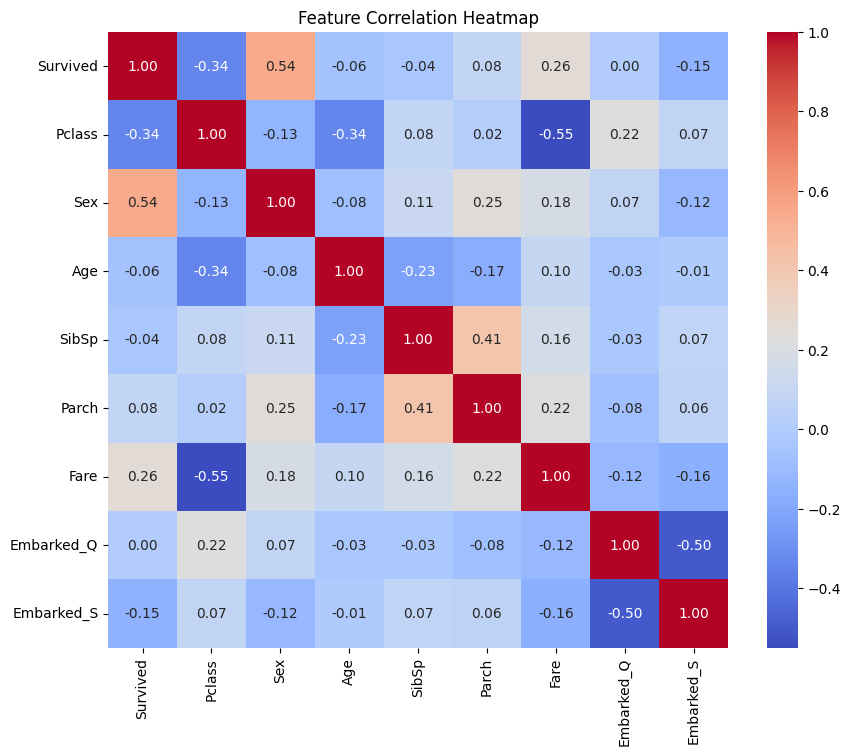

In [946]:
# Correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Feature Correlation Heatmap')
plt.show()

### 4.4 Data Splitting and Scaling

*   Separate features (X) and target (y).
*   Split into training and testing sets.
*   Scale numerical features ('Age', 'Fare', 'SibSp', 'Parch'). Note: SVMs are sensitive to feature scaling.

In [947]:
X = df.drop('Survived', axis=1)
y = df['Survived']

# Convert target variable y to -1 and 1 for SVM
y = np.where(y <= 0, -1, 1)

In [948]:
# Manual Train-Test Split (Example: 80% train, 20% test)
np.random.seed(42)
test_size = 0.2
num_test_samples = int(len(X) * test_size)
indices = np.random.permutation(len(X))
X_train = X.iloc[indices[:-num_test_samples]]
y_train = y[indices[:-num_test_samples]]
X_test = X.iloc[indices[-num_test_samples:]]
y_test = y[indices[-num_test_samples:]]

print(f"Training set size: {len(X_train)}")
print(f"Test set size: {len(X_test)}")

Training set size: 713
Test set size: 178


In [949]:
# Manual Scaling (StandardScaler: (x - mean) / std_dev)
numerical_cols = ['Age', 'Fare', 'SibSp', 'Parch']

# Calculate mean and std dev from training data ONLY
mean = X_train[numerical_cols].mean()
std = X_train[numerical_cols].std()

# Scale training data
X_train_scaled = X_train.copy()
X_train_scaled[numerical_cols] = (X_train[numerical_cols] - mean) / std

# Scale test data using training mean and std dev
X_test_scaled = X_test.copy()
X_test_scaled[numerical_cols] = (X_test[numerical_cols] - mean) / std

# Display scaled data head
X_train_scaled.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_Q,Embarked_S
709,3,0,-0.091553,0.446099,0.706765,-0.338748,False,False
439,2,0,0.133109,-0.481214,-0.493053,-0.429449,False,True
840,3,0,-0.690651,-0.481214,-0.493053,-0.478663,False,True
720,2,1,-1.739072,-0.481214,0.706765,0.000570,False,True
39,3,1,-1.139974,0.446099,-0.493053,-0.415274,False,False


## 5. SVM Implementation from Scratch

In [950]:
class SVM:
    def __init__(self, learning_rate=0.001, lambda_param=0.01, n_iters=1000):
        self.lr = learning_rate
        self.lambda_param = lambda_param
        self.n_iters = n_iters
        self.w = None
        self.b = None
        self.losses = [] # To store loss per epoch

    def _get_loss(self, X, y):
        """Calculates the SVM cost function (hinge loss + regularization)."""
        n_samples = X.shape[0]
        # Corrected: Use + self.b
        distances = 1 - y * (np.dot(X, self.w) + self.b)
        hinge_loss = np.maximum(0, distances) # max(0, 1 - y*f(x))
        cost = (self.lambda_param / 2 * np.dot(self.w, self.w)) + (np.sum(hinge_loss) / n_samples)
        return cost

    def fit(self, X, y):
        n_samples, n_features = X.shape
        y_ = np.where(y <= 0, -1, 1) # Ensure y is -1 or 1
        
        # Initialize weights and bias
        self.w = np.zeros(n_features)
        self.b = 0
        self.losses = []

        # Gradient Descent
        for epoch in range(self.n_iters):
            for idx, x_i in enumerate(X):
                # Corrected: Use + self.b in condition
                condition = y_[idx] * (np.dot(x_i, self.w) + self.b) >= 1
                if condition:
                    # Correctly classified, only update weights due to regularization
                    self.w -= self.lr * (2 * self.lambda_param * self.w)
                else:
                    # Misclassified or on margin, update weights and bias
                    # Corrected: Weight update uses y_[idx] * x_i
                    self.w -= self.lr * (2 * self.lambda_param * self.w - y_[idx] * x_i)
                    # Corrected: Bias update uses +=
                    self.b += self.lr * y_[idx]
            
            # Calculate and store loss for the epoch
            loss = self._get_loss(X, y_)
            self.losses.append(loss)
            
            # Optional: Print progress
            if (epoch + 1) % 100 == 0:
                print(f'Epoch {epoch+1}/{self.n_iters}, Loss: {loss:.4f}')

    def predict(self, X):
        # Corrected: Use + self.b
        approx = np.dot(X, self.w) + self.b
        return np.sign(approx) # Returns -1 or 1

    def decision_function(self, X):
        """Returns the raw decision scores (distance from hyperplane)."""
        # Corrected: Use + self.b
        return np.dot(X, self.w) + self.b

## 6. Train the SVM Model

In [951]:
# Convert dataframes and target arrays to numpy arrays for the SVM class and ensure float type
X_train_np = X_train_scaled.to_numpy().astype(np.float64)
# Ensure y_train is a numpy array
y_train_np = np.array(y_train)
X_test_np = X_test_scaled.to_numpy().astype(np.float64)
# Ensure y_test is a numpy array
y_test_np = np.array(y_test)

# Check dtypes after conversion
print(f"X_train_np dtype: {X_train_np.dtype}")
print(f"X_test_np dtype: {X_test_np.dtype}")

# Instantiate and train the SVM
# Note: Experiment with learning_rate, lambda_param, and n_iters for potentially better results.
# e.g., try lr=0.0001, lambda=0.01, n_iters=3000
svm_classifier = SVM(learning_rate=0.001, lambda_param=0.001, n_iters=3000)
svm_classifier.fit(X_train_np, y_train_np)

X_train_np dtype: float64
X_test_np dtype: float64
Epoch 100/3000, Loss: 0.4415
Epoch 200/3000, Loss: 0.4405
Epoch 300/3000, Loss: 0.4402
Epoch 400/3000, Loss: 0.4398
Epoch 500/3000, Loss: 0.4402
Epoch 600/3000, Loss: 0.4403
Epoch 700/3000, Loss: 0.4403
Epoch 800/3000, Loss: 0.4402
Epoch 900/3000, Loss: 0.4405
Epoch 1000/3000, Loss: 0.4403
Epoch 1100/3000, Loss: 0.4401
Epoch 1200/3000, Loss: 0.4404
Epoch 1300/3000, Loss: 0.4402
Epoch 1400/3000, Loss: 0.4398
Epoch 1500/3000, Loss: 0.4402
Epoch 1600/3000, Loss: 0.4399
Epoch 1700/3000, Loss: 0.4402
Epoch 1800/3000, Loss: 0.4405
Epoch 1900/3000, Loss: 0.4404
Epoch 2000/3000, Loss: 0.4401
Epoch 2100/3000, Loss: 0.4405
Epoch 2200/3000, Loss: 0.4397
Epoch 2300/3000, Loss: 0.4404
Epoch 2400/3000, Loss: 0.4401
Epoch 2500/3000, Loss: 0.4400
Epoch 2600/3000, Loss: 0.4404
Epoch 2700/3000, Loss: 0.4405
Epoch 2800/3000, Loss: 0.4399
Epoch 2900/3000, Loss: 0.4402
Epoch 3000/3000, Loss: 0.4403


## 7. Evaluate the Model

### 7.1 Plot Loss Curve

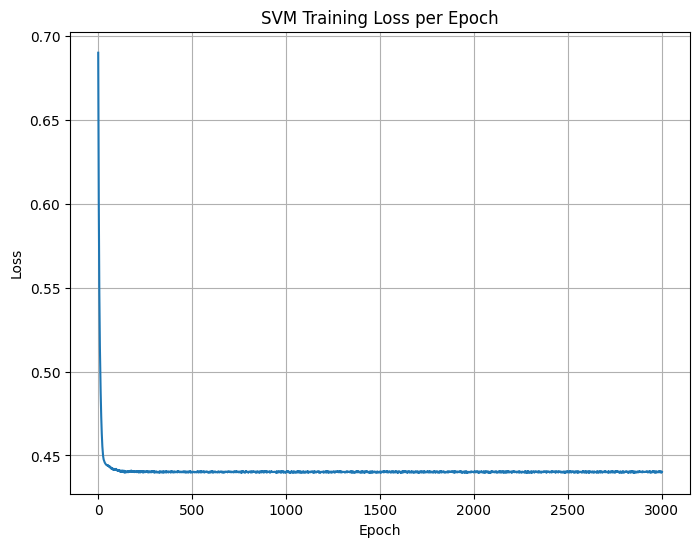

In [952]:
plt.figure(figsize=(8, 6))
plt.plot(range(1, svm_classifier.n_iters + 1), svm_classifier.losses)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('SVM Training Loss per Epoch')
plt.grid(True)
plt.show()

### 7.2 Make Predictions

In [953]:
y_pred_train = svm_classifier.predict(X_train_np)
y_pred_test = svm_classifier.predict(X_test_np)

### 7.3 Calculate Accuracy

In [954]:
def accuracy(y_true, y_pred):
    accuracy = np.sum(y_true == y_pred) / len(y_true)
    return accuracy

train_accuracy = accuracy(y_train_np, y_pred_train)
test_accuracy = accuracy(y_test_np, y_pred_test)

print(f"Training Accuracy: {train_accuracy:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")

Training Accuracy: 0.7854
Test Accuracy: 0.8146


### 7.4 Confusion Matrix

Confusion Matrix (Test Set):
[[99 14]
 [19 46]]


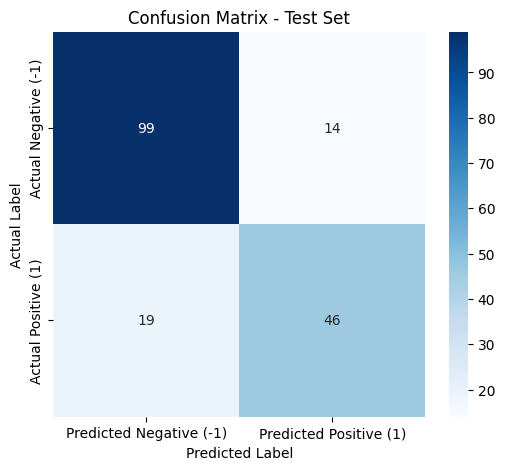

In [955]:
def confusion_matrix(y_true, y_pred):
    """Computes the confusion matrix.
    Assumes y_true and y_pred contain -1 and 1.
    Returns: [[TN, FP], [FN, TP]]
    """
    tp = np.sum((y_true == 1) & (y_pred == 1))
    tn = np.sum((y_true == -1) & (y_pred == -1))
    fp = np.sum((y_true == -1) & (y_pred == 1))
    fn = np.sum((y_true == 1) & (y_pred == -1))
    return np.array([[tn, fp], [fn, tp]])

cm = confusion_matrix(y_test_np, y_pred_test)
print("Confusion Matrix (Test Set):")
print(cm)

# Plotting the confusion matrix
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Predicted Negative (-1)', 'Predicted Positive (1)'], 
            yticklabels=['Actual Negative (-1)', 'Actual Positive (1)'])
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.title('Confusion Matrix - Test Set')
plt.show()

In [956]:
def accuracy(y_true, y_pred):
    return np.sum(y_true == y_pred) / len(y_true)

def precision_recall_f1(cm):
    """Calculates precision, recall, and F1 score from confusion matrix."""
    # cm is assumed to be in the form [[TN, FP], [FN, TP]]
    tn, fp, fn, tp = cm.ravel()
    precision = tp / (tp + fp) if (tp + fp) > 0 else 0.0
    recall = tp / (tp + fn) if (tp + fn) > 0 else 0.0
    f1 = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0.0
    return precision, recall, f1

test_accuracy = accuracy(y_test_np, y_pred_test)
cm = confusion_matrix(y_test_np, y_pred_test)
precision, recall, f1 = precision_recall_f1(cm)
# Print the metrics with explanations
print("Test Set Metrics:")
print(f"Accuracy : {test_accuracy:.4f}") # Overall correctness: (TP + TN) / Total
print(f"Precision: {precision:.4f}") # Of predicted positives, how many were actually positive? TP / (TP + FP)
print(f"Recall   : {recall:.4f}") # Of actual positives, how many were correctly identified? TP / (TP + FN)
print(f"F1 Score : {f1:.4f}") # Harmonic mean of Precision and Recall, useful for imbalanced datasets

Test Set Metrics:
Accuracy : 0.8146
Precision: 0.7667
Recall   : 0.7077
F1 Score : 0.7360


### 7.5 ROC Curve and AUC

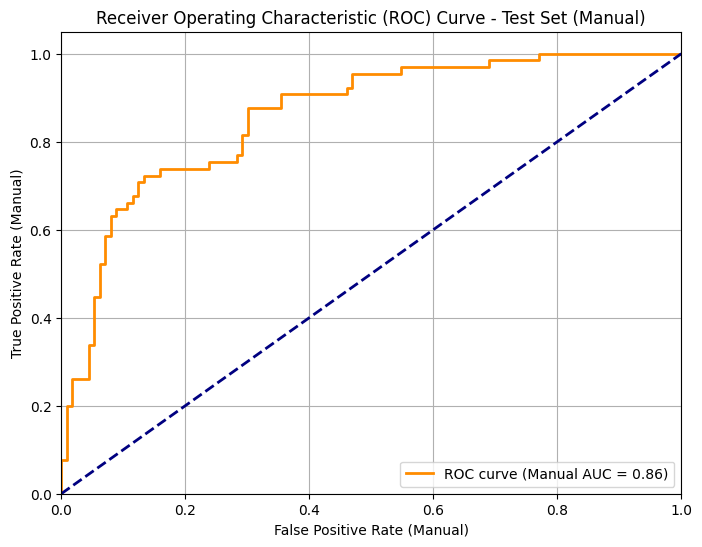

Area Under Curve (AUC) (Manual): 0.8595


In [957]:
# Manual ROC Curve and AUC Calculation

# Get decision scores for the test set
y_scores_test = svm_classifier.decision_function(X_test_np)
# Convert true labels from -1/1 to 0/1 for calculation
y_true_binary = (y_test_np + 1) / 2

# Combine scores and true labels
desc_score_indices = np.argsort(y_scores_test, kind="mergesort")[::-1]
y_scores_sorted = y_scores_test[desc_score_indices]
y_true_sorted = y_true_binary[desc_score_indices]

# Initialize lists for FPR and TPR
tpr_list = []
fpr_list = []

# Variables to track TP, FP counts
tp = 0
fp = 0
# Get total number of actual positives (P) and negatives (N)
P = np.sum(y_true_binary == 1)
N = len(y_true_binary) - P

# Iterate through sorted scores to calculate TPR/FPR at different thresholds
last_score = -np.inf
for i in range(len(y_scores_sorted)):
    # Only update counts and calculate points if the score changes (handles duplicates)
    if y_scores_sorted[i] != last_score:
        # Calculate TPR and FPR *before* updating counts for the current point
        fpr = fp / N if N > 0 else 0.0
        tpr = tp / P if P > 0 else 0.0
        fpr_list.append(fpr)
        tpr_list.append(tpr)
        last_score = y_scores_sorted[i]

    # Update counts based on the current point's true label
    if y_true_sorted[i] == 1:
        tp += 1
    else: # y_true_sorted[i] == 0
        fp += 1

# Add the final point (1, 1)
fpr = fp / N if N > 0 else 0.0
tpr = tp / P if P > 0 else 0.0
fpr_list.append(fpr)
tpr_list.append(tpr)

# Ensure (0,0) is the starting point if not already present
if not (fpr_list[0] == 0.0 and tpr_list[0] == 0.0):
    fpr_list.insert(0, 0.0)
    tpr_list.insert(0, 0.0)

# Convert lists to numpy arrays
fpr_np = np.array(fpr_list)
tpr_np = np.array(tpr_list)

# Calculate AUC using the trapezoidal rule
roc_auc_manual = 0.0
for i in range(1, len(fpr_np)):
    # Area of trapezoid: 0.5 * (base1 + base2) * height
    # Height = delta FPR, Bases = TPR values
    roc_auc_manual += (fpr_np[i] - fpr_np[i-1]) * (tpr_np[i] + tpr_np[i-1]) / 2.0

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr_np, tpr_np, color='darkorange', lw=2, label=f'ROC curve (Manual AUC = {roc_auc_manual:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--') # Diagonal line for random guess
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (Manual)')
plt.ylabel('True Positive Rate (Manual)')
plt.title('Receiver Operating Characteristic (ROC) Curve - Test Set (Manual)')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

print(f"Area Under Curve (AUC) (Manual): {roc_auc_manual:.4f}")

## 8. SVM using Scikit-learn

Now, let's perform the same classification task using the `scikit-learn` library for comparison.

### 8.1 Import sklearn Libraries

In [958]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC # Support Vector Classifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, auc

### 8.2 Prepare Data for sklearn

We'll use the original data before manual splitting/scaling and let sklearn handle it.

In [959]:
# Use the preprocessed X and the original y (0 or 1)
X_orig = df.drop('Survived', axis=1) # Get X from the preprocessed df
y_orig = df['Survived'] # Get the original Survived column (0 or 1)

# Split data using sklearn's train_test_split
X_train_sk, X_test_sk, y_train_sk, y_test_sk = train_test_split(X_orig, y_orig, test_size=0.2, random_state=42, stratify=y_orig)

# Scale features using sklearn's StandardScaler
scaler_sk = StandardScaler()
numerical_cols = ['Age', 'Fare', 'SibSp', 'Parch'] # Same columns as before

# Fit scaler on training data and transform both train and test data
X_train_sk_scaled = X_train_sk.copy()
X_test_sk_scaled = X_test_sk.copy()

X_train_sk_scaled[numerical_cols] = scaler_sk.fit_transform(X_train_sk[numerical_cols])
X_test_sk_scaled[numerical_cols] = scaler_sk.transform(X_test_sk[numerical_cols])

print("Shape of sklearn training data:", X_train_sk_scaled.shape)
print("Shape of sklearn test data:", X_test_sk_scaled.shape)
X_train_sk_scaled.head()

Shape of sklearn training data: (712, 8)
Shape of sklearn test data: (179, 8)


,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_Q,Embarked_S
692,3,0,-0.112078,-0.465084,-0.466183,0.513812,False,True
481,2,0,-0.112078,-0.465084,-0.466183,-0.662563,False,True
527,1,0,-0.112078,-0.465084,-0.466183,3.955399,False,True
855,3,1,-0.879807,-0.465084,0.727782,-0.467874,False,True
801,2,1,0.118241,0.478335,0.727782,-0.115977,False,True


### 8.3 Train sklearn SVM Model

In [960]:
# Instantiate the SVM Classifier
# We use probability=True to get probabilities for ROC curve calculation
# C is the regularization parameter (inverse of lambda)
svm_sk = SVC(kernel='linear', C=1.0, probability=True, random_state=42) # Linear kernel for comparison

# Train the model
svm_sk.fit(X_train_sk_scaled, y_train_sk)

SVC(kernel='linear', probability=True, random_state=42)

### 8.4 Evaluate sklearn Model

Sklearn SVM Training Accuracy: 0.7893
Sklearn SVM Test Accuracy: 0.7765

Sklearn Confusion Matrix (Test Set):
[[94 16]
 [24 45]]


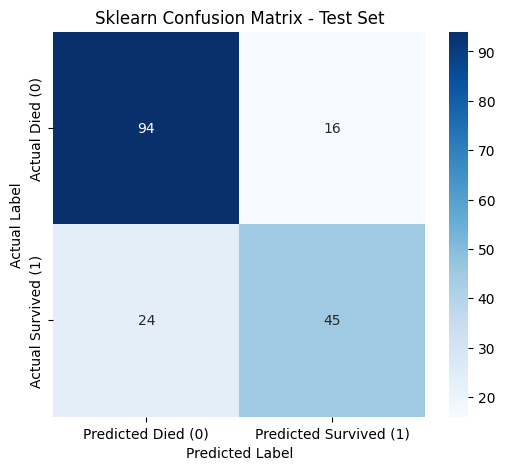


Sklearn Classification Report (Test Set):
              precision    recall  f1-score   support

           0       0.80      0.85      0.82       110
           1       0.74      0.65      0.69        69

    accuracy                           0.78       179
   macro avg       0.77      0.75      0.76       179
weighted avg       0.77      0.78      0.77       179



In [961]:
# Make predictions
y_pred_sk_train = svm_sk.predict(X_train_sk_scaled)
y_pred_sk_test = svm_sk.predict(X_test_sk_scaled)

# Calculate Accuracy
accuracy_sk_train = accuracy_score(y_train_sk, y_pred_sk_train)
accuracy_sk_test = accuracy_score(y_test_sk, y_pred_sk_test)

print(f"Sklearn SVM Training Accuracy: {accuracy_sk_train:.4f}")
print(f"Sklearn SVM Test Accuracy: {accuracy_sk_test:.4f}")

# Confusion Matrix
cm_sk = confusion_matrix(y_test_sk, y_pred_sk_test)
print("\nSklearn Confusion Matrix (Test Set):")
print(cm_sk)

# Plotting the confusion matrix
plt.figure(figsize=(6, 5))
sns.heatmap(cm_sk, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Predicted Died (0)', 'Predicted Survived (1)'], 
            yticklabels=['Actual Died (0)', 'Actual Survived (1)'])
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.title('Sklearn Confusion Matrix - Test Set')
plt.show()

# Classification Report (includes precision, recall, f1-score)
print("\nSklearn Classification Report (Test Set):")
print(classification_report(y_test_sk, y_pred_sk_test))

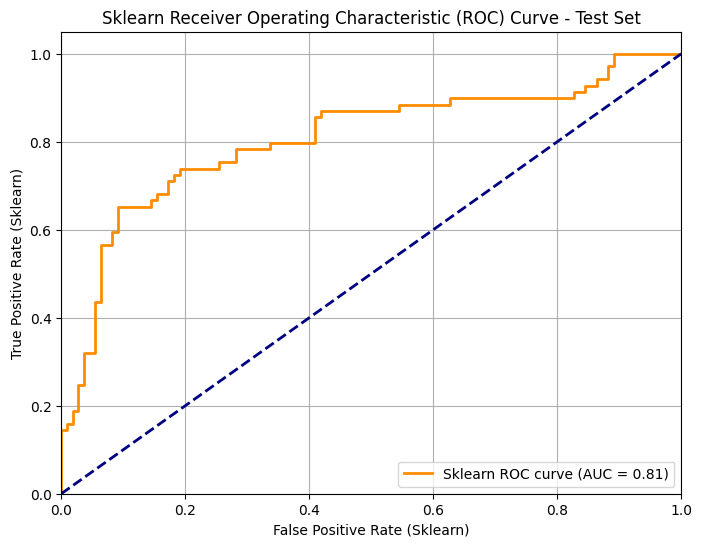

Sklearn Area Under Curve (AUC): 0.8065


In [962]:
# ROC Curve and AUC using sklearn

# Get probabilities for the positive class (Survived=1)
y_proba_sk_test = svm_sk.predict_proba(X_test_sk_scaled)[:, 1]

# Calculate ROC curve points
fpr_sk, tpr_sk, thresholds_sk = roc_curve(y_test_sk, y_proba_sk_test)

# Calculate AUC
roc_auc_sk = auc(fpr_sk, tpr_sk)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr_sk, tpr_sk, color='darkorange', lw=2, label=f'Sklearn ROC curve (AUC = {roc_auc_sk:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--') # Diagonal line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (Sklearn)')
plt.ylabel('True Positive Rate (Sklearn)')
plt.title('Sklearn Receiver Operating Characteristic (ROC) Curve - Test Set')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

print(f"Sklearn Area Under Curve (AUC): {roc_auc_sk:.4f}")